## Why regularization decreases the variance of a model

Remember that Mean Squared Error of a model is:  

$$ MSE = \sigma^2 + Bias^2(\hat{f}(x)) + Var(\hat{f}(x))$$

We talked about how regularization techniques like Lasso and Ridge Regression constrain the parameter cofficients and thus decrease variance. A good way to think about what this is the case is just through a simple visual exercise.

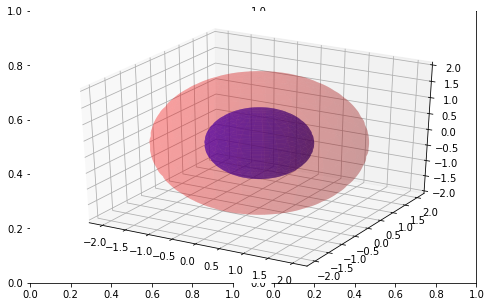

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = fig.add_subplot(111, projection='3d')
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

x1 = 2 * np.outer(np.cos(u), np.sin(v))
y1 = 2 * np.outer(np.sin(u), np.sin(v))
z1 = 2 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
ax.plot_surface(x1, y1, z1,  rstride=4, cstride=4, color='r', linewidth=0, alpha=0.2)
fig.set_size_inches(8,5)
plt.show()

Below is the Ridge Regression objective function:  

$$\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij})^2 + \lambda\sum_{j=1}^p\beta_j^2 = RSS + \lambda\sum_{j=1}^p\beta_j^2$$  

You can see that we try to minimize RSS with a penalty term, that penalizes the model for larger values of $\beta$ (assumiing $\lambda$ > 0). This constrains the possibilities of the beta values and limits the possible beta values to a smaller subsection. The above 3d graph gives you an idea of what Ridge is doing. It's limiting the possibilites of specific parameter values we can end up with for any training dataset, and thus lowering the variance of $\hat{f}$ - our predicted function - as we have fewer options to choose form. And lastly, because we will end up with more similar functions $\hat{f}$ this means the resulting values $\hat{f}$ will also be more similar in value and therefore have lower variance. This in turn, will drive down the overall MSE as $Var(\hat{f}(x))$ makes up a part of MSE.   

*Note: there is a slight difference between the image as this shows 2 spheres (1) outer sphere has radius of 2 and (2) inner sphere has radius of 1. This actually more accurately represents a more strict constraint where basically the 3 parameter coefficients we are trying to estimate must sum to be less than or equal to 2 or 1, respectively. In the guess of Ridge the polgon would have something less symetrical as it's not a hard constraint just a penalty term*



References:
- Elements of Statisical Learning - Hastie, Tibshirani and Friedman
- https://stackoverflow.com/questions/32424670/python-matplotlib-drawing-3d-sphere-with-circumferences